In [54]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df=pd.read_csv(ratings_url)

## Data Description
####  We have been using the teaching evaluation Data from the University of Texas. The dataset comprises of 463 courses, in which we have information about the teaching evaluation score received by the instructor
.
### Variable  :	Description
#### minority:	Does the instructor belong to a minority (non-Caucasian) group?
#### age:	The professor's age
#### gender:	Indicating whether the instructor was male or female.
#### credits:	Is the course a single-credit elective?
#### beauty:	Rating of the instructor's physical appearance by a panel of six students averaged across the six panelists and standardized to have a mean of zero.
#### eval:	Course overall teaching evaluation score, on a scale of 1 (very unsatisfactory) to 5 (excellent).
#### division:	Is the course an upper or lower division course?
#### native:	Is the instructor a native English speaker?
#### tenure:	Is the instructor on a tenure track?
#### students:	Number of students that participated in the evaluation.
#### allstudents:	Number of students enrolled in the course.
#### prof:	Indicating instructor identifier.


# DESCRIPTIVE STATISTICS:

In [56]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [57]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

In [58]:
ratings_df.shape

(463, 19)

In [59]:
#to get the mean of 'students' column
ratings_df['students'].mean()

36.62419006479482

In [60]:
#we can get descriptive statistics table
ratings_df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Create a histogram of the beauty variable and briefly comment on the distribution of data

(array([16., 51., 94., 66., 94., 42., 29., 40., 11., 20.]),
 array([-1.45049405, -1.10844234, -0.76639063, -0.42433892, -0.08228722,
         0.25976449,  0.6018162 ,  0.94386791,  1.28591962,  1.62797133,
         1.97002304]),
 <BarContainer object of 10 artists>)

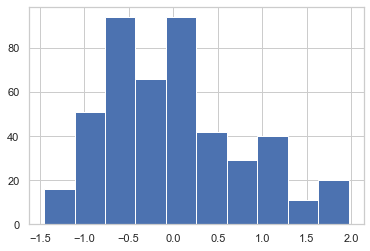

In [61]:
plt.hist(ratings_df['beauty'])

<AxesSubplot:xlabel='beauty', ylabel='Density'>

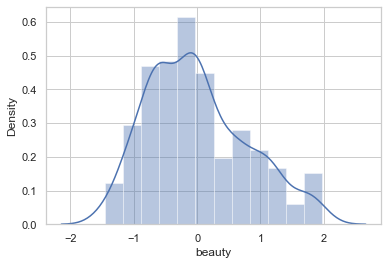

In [62]:
#in more clearly view to see the skewness
sns.distplot(ratings_df['beauty'])

#### Here are few conclusions from the diagram that most of the data for beauty is around the -0.5 and 0 the distribution is skewed to the right therefore looking at the data we can say the mean is close to 0

## Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.

In [63]:
ratings_df.groupby('gender').agg({'beauty':['mean', 'std', 'var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

## Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?

In [64]:
#first groupby to get the total sum
tenure_count = ratings_df.groupby('minority').agg({'tenure': 'count'}).reset_index()
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum()
tenure_count

,minority,tenure,percentage
0,no,399,86.177106
1,yes,64,13.822894



## What is the Median evaluation score for tenured Professors?

In [65]:
ratings_df[ratings_df['tenure'] == 'yes']['eval'].median()

4.0

# Visualisation

In [66]:
#first identify unique professors
ratings_df['prof'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69], dtype=int64)

In [67]:
#number of unique professors
ratings_df['prof'].nunique()

94

### Filtering the data set to include one observation for each instructor with a total number of observations restricted to 94.

first we drop duplicates using prof as a subset and assign it a new dataframe name called no_duplicates_ratings_df

In [68]:
no_duplicates_ratings_df=ratings_df.drop_duplicates(subset=['prof'])

In [69]:
no_duplicates_ratings_df.shape

(94, 19)

In [70]:
no_duplicates_ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


In [71]:
no_duplicates_ratings_df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.00000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,47.553191,0.088349,3.920213,36.436170,56.223404,47.500000,0.074468,0.12766,0.425532,0.021277,0.680851,0.925532,0.840426
std,10.256513,0.827506,0.527233,41.765232,73.429237,27.279418,0.263939,0.33550,0.497074,0.145079,0.468646,0.263939,0.368175
min,29.000000,-1.450494,2.200000,7.000000,11.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,-0.580686,3.525000,16.250000,21.000000,24.250000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,47.000000,-0.039794,4.000000,24.500000,34.000000,47.500000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,56.000000,0.704112,4.300000,44.750000,64.250000,70.750000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023,4.900000,348.000000,574.000000,94.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Using a bar chart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations.

In [72]:
ratings_df['division'].unique()

array(['upper', 'lower'], dtype=object)

In [73]:
ratings_df['eval'].nunique()

29

In [74]:
#Find average teaching evalution of both groups
division_eval=ratings_df.groupby('division')[['eval']].mean().reset_index()

<AxesSubplot:xlabel='division', ylabel='eval'>

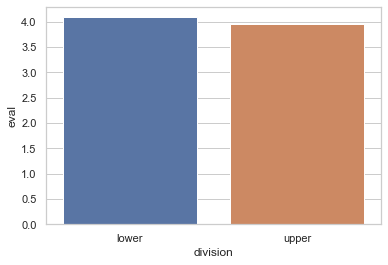

In [75]:
sns.barplot(x="division", y="eval", data=division_eval)

<AxesSubplot:xlabel='division', ylabel='eval'>

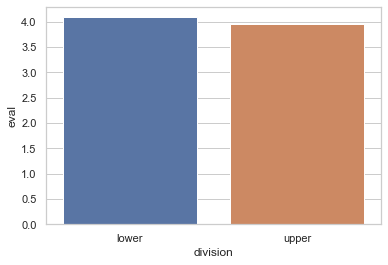

In [76]:
#lets make it more clear with white grid
sns.set(style='whitegrid')
sns.barplot(x='division',y='eval',data=division_eval)

## Do instructors teaching single credit courses get higher evalution?

In [77]:
ratings_df['credits'].nunique()

2

<AxesSubplot:xlabel='credits', ylabel='eval'>

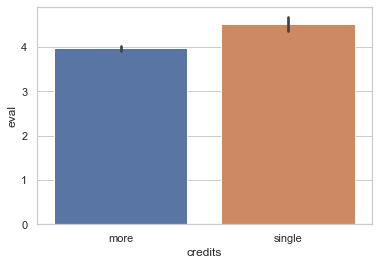

In [78]:
sns.barplot(x="credits", y="eval",data=ratings_df)

## Number of courses taught by gender. 

Text(0.5, 1.0, 'Courses taught by female and male teachers')

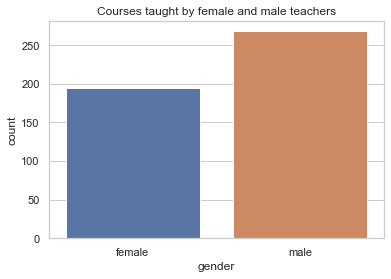

In [79]:
plot=sns.countplot(x='gender',data=ratings_df)
plot.set_title('Courses taught by female and male teachers')

Text(0.5, 1.0, 'Courses taught by female and male teachers')

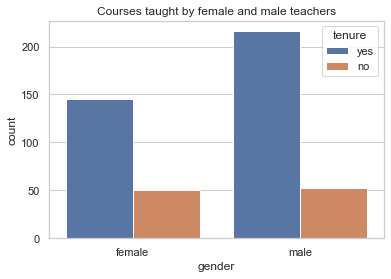

In [80]:
plot=sns.countplot(x='gender',data=ratings_df,hue='tenure')
plot.set_title('Courses taught by female and male teachers')

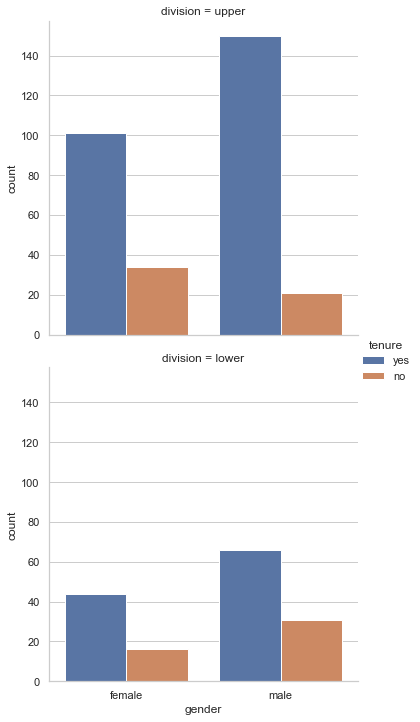

In [81]:
sns.catplot(x='gender',data=ratings_df,kind='count',hue='tenure',row='division')

## Visualize the relationship between age and teacher evalution score.

## Does age effect teaching evalution?

<AxesSubplot:xlabel='age', ylabel='eval'>

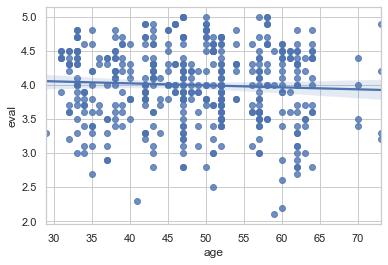

In [82]:
sns.regplot(ratings_df['age'],ratings_df['eval'])

<AxesSubplot:xlabel='age', ylabel='eval'>

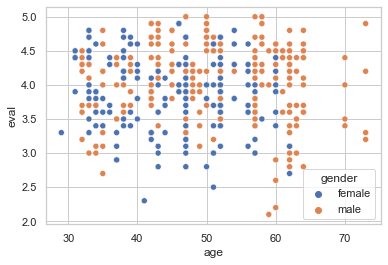

In [83]:
sns.scatterplot(x='age', y='eval' , hue='gender', data=ratings_df)

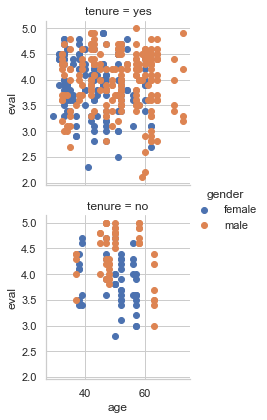

In [84]:
g=sns.FacetGrid(ratings_df, row='tenure',hue='gender')
g=(g.map(plt.scatter,'age','eval').add_legend())

## Credit a boxplot for beauty scores differentiated by credits

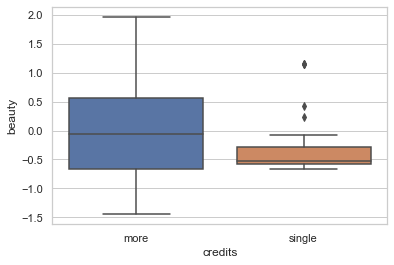

In [85]:
ax=sns.boxplot(x='credits',y='beauty',data=ratings_df)

### What is the number of courses taught by gender and tenure?

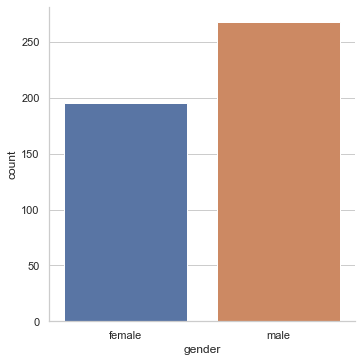

In [86]:
sns.catplot(x='gender',kind='count',data=ratings_df)

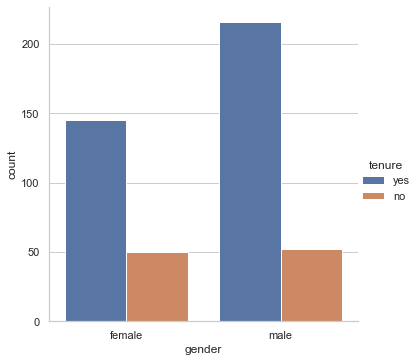

In [87]:
#compare age along tenure and gender
sns.catplot(x='gender',hue='tenure',kind='count',data=ratings_df)

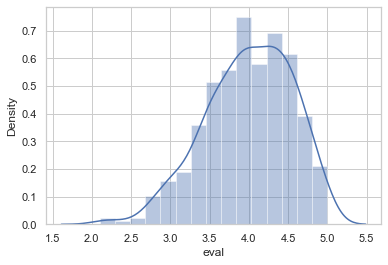

In [88]:
#Create a distribution plot of teaching evaluation scores
ax = sns.distplot(ratings_df['eval'], kde = True) #kde=True, as we need the curve

## Create a distribution plot of teaching evaluation scores

In [89]:
ratings_df['gender'].nunique()

2

In [90]:
ratings_df['eval'].nunique()

29

<AxesSubplot:xlabel='eval'>

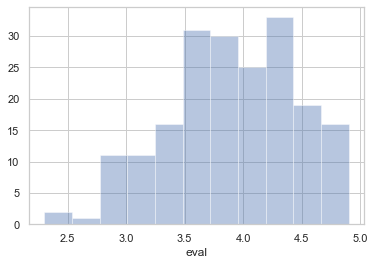

In [91]:
sns.distplot(ratings_df[ratings_df['gender'] == 'female']['eval'], kde=False)

<AxesSubplot:xlabel='eval'>

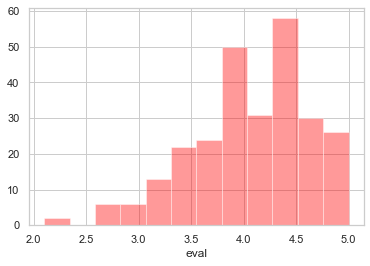

In [92]:
sns.distplot(ratings_df[ratings_df['gender'] == 'male']['eval'], color="red", kde=False) 

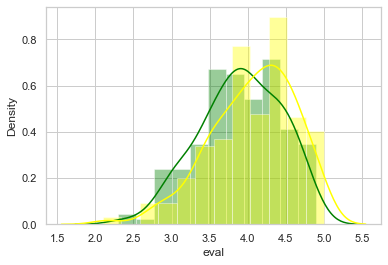

In [93]:
# use the distplot function from the seaborn library
sns.distplot(ratings_df[ratings_df['gender'] == 'female']['eval'], color='green', kde=True) 
sns.distplot(ratings_df[ratings_df['gender'] == 'male']['eval'], color="yellow", kde=True) 
plt.show()

## Visualize the data by pie chart, i.e in percentage. 

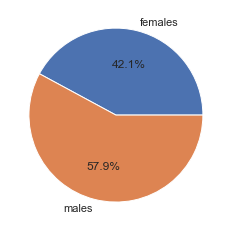

In [94]:
labels=['females','males']
sizes=[ratings_df['gender'].value_counts()[1],
      ratings_df['gender'].value_counts()[0]
      ]
fig1, ax1=plt.subplots()
plt.pie(sizes,labels=labels, autopct='%1.1f%%')
plt.show()

# Probability Distribution:

## Using the teachers' rating dataset, what is the probability of receiving an evaluation score of greater than 4.5?

In [114]:
#Find the mean and standard deviation of teachers' evaluation scores
eval_mean = round(ratings_df['eval'].mean(), 3)
eval_sd = round(ratings_df['eval'].std(), 3)
print(eval_mean, eval_sd)

3.998 0.555


In [115]:
#Use the scipy.stats module. Because python only looks to the left i.e. less than, we do remove the probability from 1 to get the other side of the tail
prob0 = scipy.stats.norm.cdf((4.5 - eval_mean)/eval_sd)
print(1 - prob0)

0.1828639734596742


# HYPOTHESIS TESTING:

## Does instructor evalution score differ by gender?

## Check it by T-Test:

### State the hypothesis

#### 𝐻_0:µ_1=µ_2  ("there is no difference in evaluation scores between male and females")
#### 𝐻_1:µ_1≠µ_2  ("there is a difference in evaluation scores between male and females")

In [97]:
import scipy.stats
from math import sqrt

In [98]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender']=='female']['eval'],
                      ratings_df[ratings_df['gender']=='male']['eval'])

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

## Here, alpha value is given as 0.05 but we get pvalue=0.0012387609449522217 which is less than 0.05, we reject the null hypothesis as there is enough evidence that there is a statistical difference in teaching evaluations based on gender.

## Does beauty score for instructors differ by age?
# By ANOVA TEST:
### First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

#### 40 years and younger
#### between 40 and 57 years
#### 57 years and older

In [99]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

### State the hypothesis

#### 𝐻_0:µ_1=µ_2=µ_3  (the three population means are equal)
#### 𝐻_1:  At least one of the means differ

In [100]:
#Test for equality of variance
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['beauty'], 
                   center='mean')

LeveneResult(statistic=8.60005668392584, pvalue=0.000215366180993476)

## # since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

In [102]:
#First, separate the three samples (one for each job category) into a variable each.
forty_lower = ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty']
forty_fiftyseven = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty']
fiftyseven_older = ratings_df[ratings_df['age_group'] == '57 years and older']['beauty']

In [106]:
#run a one-way ANOVA Test
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 17.597558611010122, P-Value: 4.3225489816137975e-08


### Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

# ANOVA: Using the teachers' rating data set, does teaching evaluation score for instructors differ by age? 

In [107]:
#Test for equality of variance
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['eval'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['eval'], 
                   center='mean')

LeveneResult(statistic=3.820237661494229, pvalue=0.02262141852021939)

In [108]:
forty_lower_eval = ratings_df[ratings_df['age_group'] == '40 years and younger']['eval']
forty_fiftyseven_eval = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval']
fiftyseven_older_eval = ratings_df[ratings_df['age_group'] == '57 years and older']['eval']

In [109]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower_eval, forty_fiftyseven_eval, fiftyseven_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 1.2226327996572206, P-Value: 0.29540894225417536


### Conclusion: Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that at least one of the means differ.

## Chi-square: Using the teachers' rating data set, is there an association between tenure and gender?¶

### State the hypothesis:

#### 𝐻_0: The proportion of teachers who are tenured is independent of gender
#### 𝐻_1: The proportion of teachers who are tenured is associated with gender

In [110]:
#Create a Cross-tab table
cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


In [111]:
'''Use the scipy.stats library and set correction equals False as that will be the same answer when done by hand, it returns:
𝜒2 value, p-value, degree of freedom, and expected values.'''
scipy.stats.chi2_contingency(cont_table, correction = True)

(2.20678166999886,
 0.1374050603563787,
 1,
 array([[ 42.95896328,  59.04103672],
        [152.04103672, 208.95896328]]))

### Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis. As there is no sufficient evidence that teachers are tenured as a result of gender.

## Correlation: Using the teachers rating dataset, Is teaching evaluation score correlated with beauty score?
### State the hypothesis:

#### 𝐻_0:  Teaching evaluation score is not correlated with beauty score
#### 𝐻_1:  Teaching evaluation score is correlated with beauty score

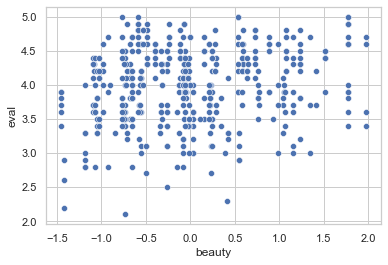

In [112]:
#Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot
ax = sns.scatterplot(x="beauty", y="eval", data=ratings_df)

In [113]:
scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

(0.1890390908404521, 4.247115419812614e-05)

### Conclusion: Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between beauty and teaching evaluation score.